Example of pre-processing steps at a glance

In [1]:
import os
import glob
from image_utils import imgtonumpy, numpytoimg, normalization, shape_as
from registration import registration

import numpy
import cv2
import json
import pydicom
from os import path
from matplotlib import pyplot as plt

The path where our example CXR file is located at

In [2]:
filex = "../test_image/sub-S03052_ses-E06146_run-1_bp-chest_vp-ap_dx.png"

We can immediately load the raw value and plot it

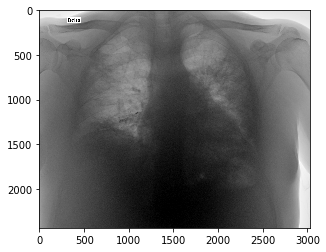

In [3]:
x = imgtonumpy(filex)
plt.imshow(x, cmap='gray')

Associated to the image we have metadata regarding how it has been collected, which help in the pre-processing stage. They are collected in an external .json file

In [4]:
datax = json.load(open(filex.replace("png", "json")))
ds1 = pydicom.dataset.Dataset.from_json(datax)

The variable "ds1" now contains all the meta-information which allows us to correctly process the data.

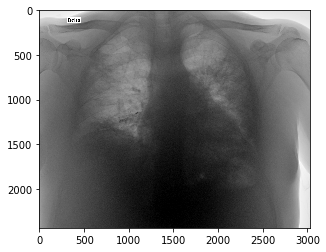

In [5]:
lut = pydicom.pixel_data_handlers.util.apply_modality_lut(x, ds1).astype(numpy.uint16)
plt.imshow(lut, cmap='gray')

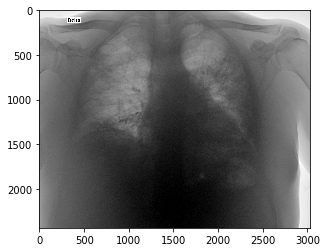

In [6]:
lut = pydicom.pixel_data_handlers.util.apply_voi_lut(lut, ds1).astype(numpy.float)
plt.imshow(lut, cmap='gray')

We now fit the image in 8 bit representation, invert pixel values if acquisition mode is in inverse mode and reshape to 1024x1024

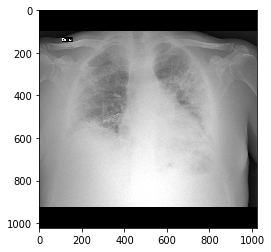

In [7]:
lut = normalization(lut)
if ds1[0x0028,0x0004].value == "MONOCHROME1":
	lut = -1*(lut-255)
lut = shape_as(lut)
plt.imshow(lut, cmap='gray')

Finally, we run registration, aligning as much as possible the image to match the same pose as a reference image.

Found elastix version: 4.800 in '/usr/bin/elastix'


<Figure size 147456x294912 with 0 Axes>

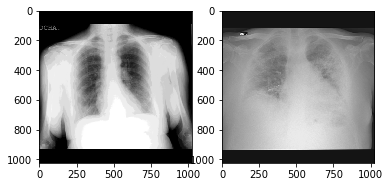

In [8]:
ref_numpy = imgtonumpy("reference.png").astype(numpy.float)

plt.figure(figsize=(1024*2,1024*4))
f, axarr = plt.subplots(1,2)

axarr[0].imshow(ref_numpy, cmap='gray')

lut = registration(lut, ref_numpy)

axarr[1].imshow(lut, cmap='gray')

plt.show()